<a href="https://colab.research.google.com/github/mahakagarwal45/Sentiment_Analysis/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Packages


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, matthews_corrcoef

Text Preprocessing

In [ ]:
df=pd.read_csv("Dataset-SA.csv")


In [ ]:
df.head(10)

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
5,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,the cooler is really fantastic and provides go...,positive
6,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,highly recommended,very good product,positive
7,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,nice,very nice,positive
8,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,unsatisfactory,very bad cooler,negative
9,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,4,worth the money,very good,positive


In [ ]:
df.tail(2)

,product_name,product_price,Rate,Review,Summary,Sentiment
12367,"Midea TORRINO,WQP12-5201F Free Standing 13 Pla...",25990,5,simply awesome,good product,positive
12368,"Midea TORRINO,WQP12-5201F Free Standing 13 Pla...",25990,3,nice,not impressive looks are good but wash non com...,neutral


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12369 entries, 0 to 12368
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_name   12369 non-null  object
 1   product_price  12369 non-null  int64 
 2   Rate           12369 non-null  int64 
 3   Review         12369 non-null  object
 4   Summary        12368 non-null  object
 5   Sentiment      12369 non-null  object
dtypes: int64(2), object(4)
memory usage: 579.9+ KB


Handling Null Values

In [ ]:
df.isnull().sum()

,0
product_name,0
product_price,0
Rate,0
Review,0
Summary,1
Sentiment,0


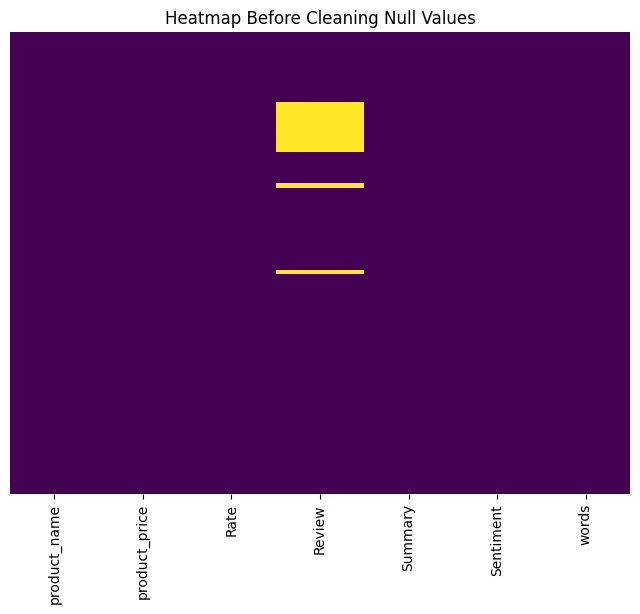

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap Before Cleaning Null Values')
plt.show()


In [ ]:
df=df.dropna(subset=['Summary'])

In [ ]:
df.isnull().sum()

,0
product_name,0
product_price,0
Rate,0
Review,24662
Summary,0
Sentiment,0
words,0


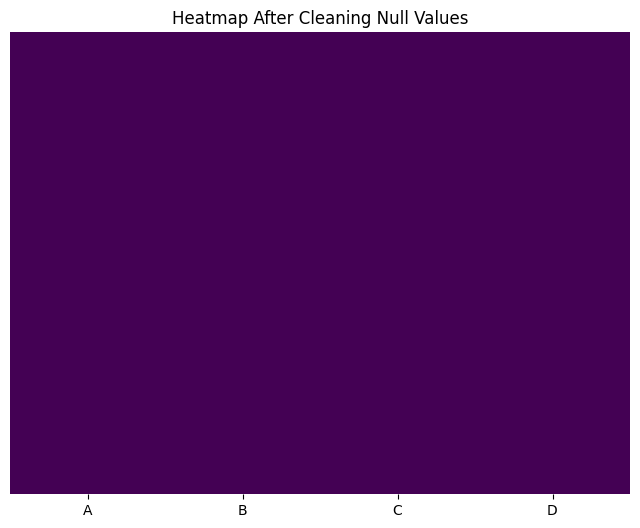

In [ ]:
df_cleaned = df.fillna(df.mean())
plt.figure(figsize=(8, 6))
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap After Cleaning Null Values')
plt.show()


Tokenization

In [ ]:
import nltk
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

# Clear NLTK cache in case of corrupted downloads
nltk.data.clear_cache()

# Download the correct 'punkt' tokenizer model
nltk.download('punkt')

# Apply preprocessing to strip extra whitespaces
df['Summary'] = df['Summary'].apply(lambda x: x.strip())

# Test tokenization on a sample sentence (debugging step)
try:
    test_sentence = "This is a test sentence."
    print(word_tokenize(test_sentence))  # Should print a list of words

    # Apply word_tokenize to the DataFrame
    df['words'] = df['Summary'].apply(word_tokenize)
except LookupError:
    # If word_tokenize throws an error, use TreebankWordTokenizer
    tokenizer = TreebankWordTokenizer()
    df['words'] = df['Summary'].apply(lambda x: tokenizer.tokenize(x.strip()))

# Check the first few rows of the resulting 'words' column
print(df['words'].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-132-76a9ea6dbbf8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Summary'] = df['Summary'].apply(lambda x: x.strip())


0    [great, cooler, excellent, air, flow, and, for...
1        [best, budget, 2, fit, cooler, nice, cooling]
2    [the, quality, is, good, but, the, power, of, ...
3           [very, bad, product, its, a, only, a, fan]
4                                    [ok, ok, product]
Name: words, dtype: object


In [ ]:
df


,product_name,product_price,Rate,Review,Summary,Sentiment,words
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive,"[great, cooler, excellent, air, flow, and, for..."
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive,"[best, budget, 2, fit, cooler, nice, cooling]"
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive,"[the, quality, is, good, but, the, power, of, ..."
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative,"[very, bad, product, its, a, only, a, fan]"
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral,"[ok, ok, product]"
...,...,...,...,...,...,...,...
12364,"Midea TORRINO,WQP12-5201F Free Standing 13 Pla...",25990,5,classy product,initially received demage productafter replaci...,positive,"[initially, received, demage, productafter, re..."
12365,"Midea TORRINO,WQP12-5201F Free Standing 13 Pla...",25990,5,worth every penny,when i washing after wash some white spot is s...,positive,"[when, i, washing, after, wash, some, white, s..."
12366,"Midea TORRINO,WQP12-5201F Free Standing 13 Pla...",25990,4,pretty good,i was skeptical about purchasing dishwasher it...,positive,"[i, was, skeptical, about, purchasing, dishwas..."
12367,"Midea TORRINO,WQP12-5201F Free Standing 13 Pla...",25990,5,simply awesome,good product,positive,"[good, product]"


Lowercase

In [ ]:
df['words']=[[word.lower() for word in sentence]for sentence in df['words']]

In [ ]:
df.head(10)

,product_name,product_price,Rate,Review,Summary,Sentiment,words
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive,"[great, cooler, excellent, air, flow, and, for..."
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive,"[best, budget, 2, fit, cooler, nice, cooling]"
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive,"[the, quality, is, good, but, the, power, of, ..."
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative,"[very, bad, product, its, a, only, a, fan]"
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral,"[ok, ok, product]"
5,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,the cooler is really fantastic and provides go...,positive,"[the, cooler, is, really, fantastic, and, prov..."
6,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,highly recommended,very good product,positive,"[very, good, product]"
7,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,nice,very nice,positive,"[very, nice]"
8,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,unsatisfactory,very bad cooler,negative,"[very, bad, cooler]"
9,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,4,worth the money,very good,positive,"[very, good]"


Stop word removal

In [ ]:
from nltk.corpus import stopwords #to remove stop words like is ,of ,and etc...
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words=set(stopwords.words('english'))
def stopword(sentence):
    return [word for word in sentence if word not in stop_words]

df['words']=df['words'].apply(stopword)

In [ ]:
df.head(10)

,product_name,product_price,Rate,Review,Summary,Sentiment,words
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive,"[great, cooler, excellent, air, flow, price, a..."
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive,"[best, budget, 2, fit, cooler, nice, cooling]"
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive,"[quality, good, power, air, decent]"
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative,"[bad, product, fan]"
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral,"[ok, ok, product]"
5,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,the cooler is really fantastic and provides go...,positive,"[cooler, really, fantastic, provides, good, ai..."
6,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,highly recommended,very good product,positive,"[good, product]"
7,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,nice,very nice,positive,[nice]
8,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,unsatisfactory,very bad cooler,negative,"[bad, cooler]"
9,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,4,worth the money,very good,positive,[good]


Stemming

In [ ]:
from nltk.stem import PorterStemmer  # to change the word into it's base word.Example eating = eat,formality=formalti
stemmer=PorterStemmer()

def stemming_word(row):
    return [stemmer.stem(word) for word in row]

df['words']=df['words'].apply(stemming_word)


In [ ]:
df.head(5)

,product_name,product_price,Rate,Review,Summary,Sentiment,words
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive,"[great, cooler, excel, air, flow, price, amaz,..."
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive,"[best, budget, 2, fit, cooler, nice, cool]"
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive,"[qualiti, good, power, air, decent]"
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative,"[bad, product, fan]"
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral,"[ok, ok, product]"


Encoding

In [ ]:
dict={'positive':1,'neutral':0,'negative':-1} # convert sentiment column into numeric column
df['Sentiment']=df['Sentiment'].map(dict)

In [ ]:
df['Sentiment'].value_counts()

,count
Sentiment,
1,10243
-1,1585
0,540


Remove unnecessary columns


In [ ]:
data=df[['words','Sentiment']]

In [ ]:
data

,words,Sentiment
0,"[great, cooler, excel, air, flow, price, amaz,...",1
1,"[best, budget, 2, fit, cooler, nice, cool]",1
2,"[qualiti, good, power, air, decent]",1
3,"[bad, product, fan]",-1
4,"[ok, ok, product]",0
...,...,...
12364,"[initi, receiv, demag, productaft, replac, rec...",1
12365,"[wash, wash, white, spot, show, articleswhat, ...",1
12366,"[skeptic, purchas, dishwash, good, stainless, ...",1
12367,"[good, product]",1


Feature Extraction




In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

def word_vecs(data):
    # Convert entries to strings if they are not already
    cleaned_data = [" ".join(map(str, words)) if isinstance(words, list) else str(words) for words in data['words']]
    docs = nlp.pipe(cleaned_data, batch_size=50)
    return [doc.vector for doc in docs]

data['words'] = word_vecs(data)


<ipython-input-145-6da374da28c0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['words'] = word_vecs(data)


In [ ]:
data

,words,Sentiment
0,"[0.1233848, -0.72671235, -0.008297946, 0.25418...",1
1,"[-0.4494844, -0.6611499, 0.29511842, -0.250185...",1
2,"[0.014499593, -0.9585246, -0.027478207, 0.0362...",1
3,"[-0.16969784, -0.9981125, -0.5672183, 0.224146...",-1
4,"[-0.11683122, -0.26854584, 0.09549197, 0.21983...",0
...,...,...
12364,"[-0.09418414, -0.7153198, 0.016546585, 0.10560...",1
12365,"[-0.12618566, -0.6474976, 0.13441502, -0.00223...",1
12366,"[-0.33039168, -0.74390334, 0.028529644, 0.1542...",1
12367,"[-0.39959332, -0.7848977, -0.42706123, 0.49756...",1


In [ ]:
data.to_json('output.json', orient='records', lines=True)

In [ ]:
data_2=pd.read_json('output.json',lines=True)

In [ ]:
data_2

,words,Sentiment
0,"[0.1233848035, -0.7267123461, -0.0082979463000...",1
1,"[-0.4494844079, -0.6611499190000001, 0.2951184...",1
2,"[0.0144995926, -0.9585245848, -0.0274782069, 0...",1
3,"[-0.16969783600000002, -0.9981124997, -0.56721...",-1
4,"[-0.1168312207, -0.2685458362, 0.0954919681, 0...",0
...,...,...
12363,"[-0.0941841379, -0.7153198123000001, 0.0165465...",1
12364,"[-0.1261856556, -0.6474975944, 0.1344150156, -...",1
12365,"[-0.3303916752, -0.7439033389, 0.0285296440000...",1
12366,"[-0.39959332350000004, -0.7848976851, -0.42706...",1


Round the values

In [ ]:
vectorized_data=data_2['words']

In [ ]:
vectorized_data=vectorized_data.apply(lambda x :[ round(value,3) for value in x])

In [ ]:
vectorized_data=vectorized_data.apply(lambda x: np.array(x))

In [ ]:
vectorized_data

,words
0,"[0.123, -0.727, -0.008, 0.254, -0.299, -0.033,..."
1,"[-0.449, -0.661, 0.295, -0.25, -0.485, 0.298, ..."
2,"[0.014, -0.959, -0.027, 0.036, -0.318, 0.071, ..."
3,"[-0.17, -0.998, -0.567, 0.224, -0.288, 0.097, ..."
4,"[-0.117, -0.269, 0.095, 0.22, -0.425, -0.109, ..."
...,...
12363,"[-0.094, -0.715, 0.017, 0.106, -0.052, -0.229,..."
12364,"[-0.126, -0.647, 0.134, -0.002, -0.23, -0.144,..."
12365,"[-0.33, -0.744, 0.029, 0.154, -0.208, -0.167, ..."
12366,"[-0.4, -0.785, -0.427, 0.498, -0.324, -0.056, ..."


In [ ]:
X_data=pd.DataFrame(vectorized_data.tolist())

In [ ]:
X_data

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.123,-0.727,-0.008,0.254,-0.299,-0.033,0.171,0.629,0.136,-0.287,...,-0.056,-0.375,-0.997,0.568,0.195,-0.063,1.058,0.801,-0.218,0.259
1,-0.449,-0.661,0.295,-0.250,-0.485,0.298,0.060,0.475,0.263,-0.808,...,-0.180,-0.412,-0.297,0.969,0.232,0.066,0.881,0.716,0.299,0.350
2,0.014,-0.959,-0.027,0.036,-0.318,0.071,0.091,0.502,-0.052,-0.559,...,0.047,0.146,-0.809,0.966,0.180,-0.134,1.063,1.182,0.191,0.203
3,-0.170,-0.998,-0.567,0.224,-0.288,0.097,0.183,0.479,0.068,-0.241,...,0.005,-0.497,-0.876,0.956,0.036,0.458,1.699,0.532,0.372,0.168
4,-0.117,-0.269,0.095,0.220,-0.425,-0.109,0.638,0.147,-0.451,-0.194,...,0.431,0.440,0.160,0.202,-0.360,-0.121,0.901,0.400,-0.673,0.127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12363,-0.094,-0.715,0.017,0.106,-0.052,-0.229,0.276,0.719,0.104,-0.008,...,0.048,-0.180,-0.820,0.545,0.161,-0.121,0.779,0.697,-0.102,0.262
12364,-0.126,-0.647,0.134,-0.002,-0.230,-0.144,0.175,0.693,0.272,-0.165,...,-0.095,-0.496,-0.839,0.369,-0.165,0.193,0.530,0.706,-0.026,0.187
12365,-0.330,-0.744,0.029,0.154,-0.208,-0.167,0.068,0.302,0.222,-0.395,...,0.080,-0.108,-0.905,0.863,0.231,0.148,1.077,0.857,-0.079,0.053
12366,-0.400,-0.785,-0.427,0.498,-0.324,-0.056,0.986,0.367,0.128,-0.259,...,-0.185,-0.051,-0.934,0.612,0.162,0.035,1.449,0.743,0.065,0.722


In [ ]:
data_3=pd.concat([data_2,X_data],axis=1)

In [ ]:
data_3

,words,Sentiment,0,1,2,3,4,5,6,7,...,86,87,88,89,90,91,92,93,94,95
0,"[0.1233848035, -0.7267123461, -0.0082979463000...",1,0.123,-0.727,-0.008,0.254,-0.299,-0.033,0.171,0.629,...,-0.056,-0.375,-0.997,0.568,0.195,-0.063,1.058,0.801,-0.218,0.259
1,"[-0.4494844079, -0.6611499190000001, 0.2951184...",1,-0.449,-0.661,0.295,-0.250,-0.485,0.298,0.060,0.475,...,-0.180,-0.412,-0.297,0.969,0.232,0.066,0.881,0.716,0.299,0.350
2,"[0.0144995926, -0.9585245848, -0.0274782069, 0...",1,0.014,-0.959,-0.027,0.036,-0.318,0.071,0.091,0.502,...,0.047,0.146,-0.809,0.966,0.180,-0.134,1.063,1.182,0.191,0.203
3,"[-0.16969783600000002, -0.9981124997, -0.56721...",-1,-0.170,-0.998,-0.567,0.224,-0.288,0.097,0.183,0.479,...,0.005,-0.497,-0.876,0.956,0.036,0.458,1.699,0.532,0.372,0.168
4,"[-0.1168312207, -0.2685458362, 0.0954919681, 0...",0,-0.117,-0.269,0.095,0.220,-0.425,-0.109,0.638,0.147,...,0.431,0.440,0.160,0.202,-0.360,-0.121,0.901,0.400,-0.673,0.127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12363,"[-0.0941841379, -0.7153198123000001, 0.0165465...",1,-0.094,-0.715,0.017,0.106,-0.052,-0.229,0.276,0.719,...,0.048,-0.180,-0.820,0.545,0.161,-0.121,0.779,0.697,-0.102,0.262
12364,"[-0.1261856556, -0.6474975944, 0.1344150156, -...",1,-0.126,-0.647,0.134,-0.002,-0.230,-0.144,0.175,0.693,...,-0.095,-0.496,-0.839,0.369,-0.165,0.193,0.530,0.706,-0.026,0.187
12365,"[-0.3303916752, -0.7439033389, 0.0285296440000...",1,-0.330,-0.744,0.029,0.154,-0.208,-0.167,0.068,0.302,...,0.080,-0.108,-0.905,0.863,0.231,0.148,1.077,0.857,-0.079,0.053
12366,"[-0.39959332350000004, -0.7848976851, -0.42706...",1,-0.400,-0.785,-0.427,0.498,-0.324,-0.056,0.986,0.367,...,-0.185,-0.051,-0.934,0.612,0.162,0.035,1.449,0.743,0.065,0.722


In [ ]:
data_3.isnull().sum()

,0
words,0
Sentiment,0
0,5
1,5
2,5
...,...
91,5
92,5
93,5
94,5


In [ ]:
data_3=data_3.dropna()

In [ ]:
data_3.to_json('data_4.json',orient='records',lines=True)

Classification (Train 80% and Test 20%) with four models


Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split

X=data_3.drop(['words','Sentiment'],axis=1)
y=data_3['Sentiment']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

k_best=SelectKBest(score_func=mutual_info_classif,k=60)
X_train_selected=k_best.fit_transform(X_train,y_train)
X_test_selected=k_best.fit(X_test,y_test)

selected_features_indices=k_best.get_support(indices=True)
print(f'Selected Features indices :{selected_features_indices}')

Selected Features indices :[ 0  1  2  5  6  7  8  9 12 13 14 15 17 18 19 20 21 22 23 24 26 27 28 30
 33 35 37 38 39 41 42 45 47 48 52 53 55 56 58 59 61 63 64 66 67 68 69 73
 75 76 78 81 82 83 85 86 90 91 93 95]


In [ ]:
selected_features=[ 2 , 6 , 8 , 9 , 12 , 13 , 14 , 15 , 17 , 18 , 19 , 20 , 22 , 23 , 24 , 25 , 27, 28 ,30 ,32 ,33, 34, 35, 36,
 37, 39, 41, 42, 43, 44, 45, 47, 48, 49, 52, 53, 55, 56, 58, 61, 63, 64, 67,68, 69, 72, 73, 75,
 76, 78, 80, 81, 83, 85, 86, 88, 90, 91, 93, 95]

In [ ]:
X_train_selected=X_train.iloc[:,selected_features]
X_test_selected=X_test.iloc[:,selected_features]

1. LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SpatialDropout1D

# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=20000, output_dim=100, input_length=60))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())
history = model.fit(X_train_selected, y_train, epochs=1, batch_size=32, validation_data=(X_test_selected, y_test))
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_1                  │ ?                           │     0 (unbuilt) │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
310/310 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.8257 - loss: 0.6227 - val_accuracy: 0.8245 - val_loss: 0.6107
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8217 - loss: 0.6278
Test Accuracy: 0.8245046734809875


In [ ]:
model.save('lstm.h5')

Report

In [ ]:
lstm_pred_prob = model.predict(X_test_selected)

# Convert probabilities to binary class labels
lstm_pred = (lstm_pred_prob > 0.5).astype(int)

# Calculate classification metrics
accuracy = accuracy_score(y_test, lstm_pred)
precision = precision_score(y_test, lstm_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, lstm_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, lstm_pred, average='weighted', zero_division=0)
cm = confusion_matrix(y_test, lstm_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall (Sensitivity): {recall}")
print(f"F1-Score: {f1}")
print("Confusion Matrix:")
print(cm)

# Calculate TP, FP, FN, TN
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
TN = np.sum(cm) - (TP + FP + FN)

# Calculate Specificity, NPV, FPR, FNR, and MCC
def safe_divide(numerator, denominator):
    return np.divide(numerator, denominator, out=np.zeros_like(numerator, dtype=float), where=denominator != 0)

specificity = safe_divide(TN, (TN + FP)).mean()
npv = safe_divide(TN, (TN + FN)).mean()
fpr = safe_divide(FP, (FP + TN)).mean()
fnr = safe_divide(FN, (FN + TP)).mean()
mcc = matthews_corrcoef(y_test, lstm_pred)

print(f"Specificity (True Negative Rate): {specificity}")
print(f"Negative Predictive Value (NPV): {npv}")
print(f"False Positive Rate (FPR): {fpr}")
print(f"False Negative Rate (FNR): {fnr}")
print(f"Matthews Correlation Coefficient (MCC): {mcc}")

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Accuracy: 0.8245046502224019
Precision: 0.6798079182383654
Recall (Sensitivity): 0.8245046502224019
F1-Score: 0.7451972437072153
Confusion Matrix:
[[   0    0  323]
 [   0    0  111]
 [   0    0 2039]]
Specificity (True Negative Rate): 0.6666666666666666
Negative Predictive Value (NPV): 0.6081682167408006
False Positive Rate (FPR): 0.3333333333333333
False Negative Rate (FNR): 0.6666666666666666
Matthews Correlation Coefficient (MCC): 0.0


2. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

model2=LogisticRegression()
model2.fit(X_train_selected,y_train)
lr_pred=model2.predict(X_test_selected)
lr_pred

array([ 1,  1,  1, ..., -1, -1, -1])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

model2=LogisticRegression()
model2.fit(X_train_selected,y_train)
lr_pred=model2.predict(X_test_selected)


accuracy = accuracy_score(y_test,lr_pred)

# Calculate Precision
precision = precision_score(y_test,lr_pred,average='weighted')

# Calculate Recall (Sensitivity or True Positive Rate)
recall = recall_score(y_test,lr_pred,average='weighted')

# Calculate F1-Score
f1 = f1_score(y_test,lr_pred,average='weighted')
cm = confusion_matrix(y_test,lr_pred)
print("Confusion Matrix:")
print(cm)
# Handle case where confusion matrix is 1-dimensional
if cm.ndim == 1:
    TP = cm[0]  # True Positives
    FP = 0      # False Positives (no false positives in this case)
    FN = 0      # False Negatives (no false negatives in this case)
    TN = 0      # True Negatives (no true negatives in this case)
else:
    TP = np.diag(cm)  # True Positives
    FP = np.sum(cm, axis=0) - TP  # False Positives
    FN = np.sum(cm, axis=1) - TP  # False Negatives
    TN = np.sum(cm) - (TP + FP + FN)

# Calculate True Negatives (TN)
total_samples = np.sum(cm)
TN = total_samples - (TP + FP + FN)


# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test,lr_pred)

# Calculate Negative Predictive Value (NPV)
npv = TN / (TN + FN)

# Calculate False Positive Rate (FPR)
fpr = FP / (FP + TN)

specificity = TN / (TN + FP)

# Calculate False Negative Rate (FNR)
fnr = FN / (FN + TP)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall (Sensitivity): {recall}")
print(f"F1-Score: {f1}")
print(f"Specificity: {specificity}")
print(f"Matthews Correlation Coefficient (MCC): {mcc}")
print(f"Negative Predictive Value (NPV): {npv}")
print(f"False Positive Rate (FPR): {fpr}")
print(f"False Negative Rate (FNR): {fnr}")

Confusion Matrix:
[[  61    1  261]
 [  14   19   78]
 [  29    7 2003]]
Accuracy: 0.8422968054993935
Precision: 0.8133528920312691
Recall (Sensitivity): 0.8422968054993935
F1-Score: 0.8036064946920481
Specificity: [0.98       0.99661304 0.21889401]
Matthews Correlation Coefficient (MCC): 0.31776761070150383
Negative Predictive Value (NPV): [0.88940481 0.96238757 0.72519084]
False Positive Rate (FPR): [0.02       0.00338696 0.78110599]
False Negative Rate (FNR): [0.81114551 0.82882883 0.01765571]


3. Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Assuming X_train_selected, y_train, X_test_selected, y_test are already defined

# Create and train the decision tree classifier model
dc_model = DecisionTreeClassifier()
dc_model.fit(X_train_selected, y_train)

# Make predictions on the test data
dc_pred = dc_model.predict(X_test_selected)

# Calculate Accuracy
accuracy = accuracy_score(y_test, dc_pred)
print(f"Accuracy: {accuracy}")

# Calculate Precision
precision = precision_score(y_test, dc_pred, average='weighted')
print(f"Precision: {precision}")

# Calculate Recall (Sensitivity or True Positive Rate)
recall = recall_score(y_test, dc_pred, average='weighted')
print(f"Recall (Sensitivity): {recall}")

# Calculate F1-Score
f1 = f1_score(y_test, dc_pred, average='weighted')
print(f"F1-Score: {f1}")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, dc_pred)
print("Confusion Matrix:")
print(cm)
# Handle case where confusion matrix is 1-dimensional
if cm.ndim == 1:
    TP = cm[0]  # True Positives
    FP = 0      # False Positives (no false positives in this case)
    FN = 0      # False Negatives (no false negatives in this case)
    TN = 0      # True Negatives (no true negatives in this case)
else:
    TP = np.diag(cm)  # True Positives
    FP = np.sum(cm, axis=0) - TP  # False Positives
    FN = np.sum(cm, axis=1) - TP  # False Negatives
    TN = np.sum(cm) - (TP + FP + FN)  # True Negatives

# Calculate metrics ensuring no division by zero
def safe_divide(numerator, denominator):
    return np.divide(numerator, denominator, out=np.zeros_like(numerator, dtype=float), where=denominator != 0)

# Calculate Specificity (True Negative Rate)
specificity = safe_divide(TN, (TN + FP))
specificity = np.mean(specificity)  # Average specificity for multiclass

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, dc_pred)

# Calculate Negative Predictive Value (NPV)
npv = safe_divide(TN, (TN + FN))
npv = np.mean(npv)  # Average NPV for multiclass

# Calculate False Positive Rate (FPR)
fpr = safe_divide(FP, (FP + TN))
fpr = np.mean(fpr)  # Average FPR for multiclass

# Calculate False Negative Rate (FNR)
fnr = safe_divide(FN, (FN + TP))
fnr = np.mean(fnr)  # Average FNR for multiclass

print(f"Specificity (True Negative Rate): {specificity}")
print(f"Matthews Correlation Coefficient (MCC): {mcc}")
print(f"Negative Predictive Value (NPV): {npv}")
print(f"False Positive Rate (FPR): {fpr}")
print(f"False Negative Rate (FNR): {fnr}")

Accuracy: 0.7945814799838253
Precision: 0.7982957539739012
Recall (Sensitivity): 0.7945814799838253
F1-Score: 0.7963966180823218
Confusion Matrix:
[[ 133   16  174]
 [  23   36   52]
 [ 175   68 1796]]
Specificity (True Negative Rate): 0.7838688558071537
Matthews Correlation Coefficient (MCC): 0.32921962786621123
Negative Predictive Value (NPV): 0.7802069961918404
False Positive Rate (FPR): 0.21613114419284632
False Negative Rate (FNR): 0.46102901216422837


4. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_selected, y_train)
rf_pred = rf_model.predict(X_test_selected)

accuracy = accuracy_score(y_test,rf_pred)

# Calculate Precision
precision = precision_score(y_test,rf_pred,average='weighted')

# Calculate Recall (Sensitivity or True Positive Rate)
recall = recall_score(y_test,rf_pred,average='weighted')

# Calculate F1-Score
f1 = f1_score(y_test,rf_pred,average='weighted')
cm = confusion_matrix(y_test,rf_pred)
print("Confusion Matrix:")
print(cm)
# Handle case where confusion matrix is 1-dimensional
if cm.ndim == 1:
    TP = cm[0]  # True Positives
    FP = 0      # False Positives (no false positives in this case)
    FN = 0      # False Negatives (no false negatives in this case)
    TN = 0      # True Negatives (no true negatives in this case)
else:
    TP = np.diag(cm)  # True Positives
    FP = np.sum(cm, axis=0) - TP  # False Positives
    FN = np.sum(cm, axis=1) - TP  # False Negatives
    TN = np.sum(cm) - (TP + FP + FN)

# Calculate True Negatives (TN)
total_samples = np.sum(cm)
TN = total_samples - (TP + FP + FN)


# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test,rf_pred)

# Calculate Negative Predictive Value (NPV)
npv = TN / (TN + FN)

# Calculate False Positive Rate (FPR)
fpr = FP / (FP + TN)

specificity = TN / (TN + FP)

# Calculate False Negative Rate (FNR)
fnr = FN / (FN + TP)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall (Sensitivity): {recall}")
print(f"F1-Score: {f1}")
print(f"Specificity: {specificity}")
print(f"Matthews Correlation Coefficient (MCC): {mcc}")
print(f"Negative Predictive Value (NPV): {npv}")
print(f"False Positive Rate (FPR): {fpr}")
print(f"False Negative Rate (FNR): {fnr}")

Confusion Matrix:
[[  92    4  227]
 [   9   33   69]
 [  12   10 2017]]
Accuracy: 0.8661544682571776
Precision: 0.8568435260995982
Recall (Sensitivity): 0.8661544682571776
F1-Score: 0.8381276122385929
Specificity: [0.99023256 0.99407282 0.31797235]
Matthews Correlation Coefficient (MCC): 0.45860088602812765
Negative Predictive Value (NPV): [0.90211864 0.96784831 0.8625    ]
False Positive Rate (FPR): [0.00976744 0.00592718 0.68202765]
False Negative Rate (FNR): [0.71517028 0.7027027  0.0107896 ]


Comparative study

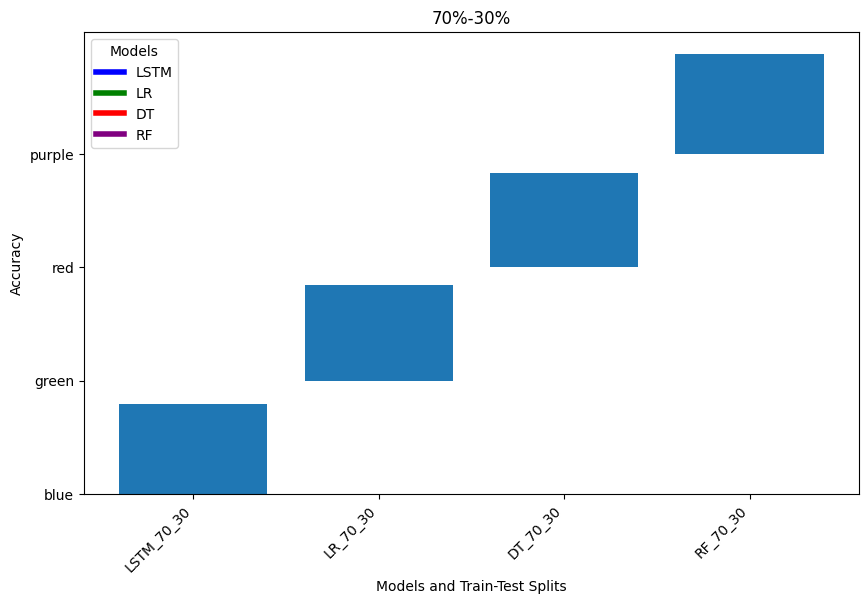

In [ ]:
models = ['LSTM_70_30', 'LR_70_30', 'DT_70_30', 'RF_70_30']
accuracy = [0.7926240563392639,0.8436,0.8353578223327968,0.8819698521879116]

color = ['blue', 'green', 'red', 'purple']
bar_width = 0.80
index = np.arange(len(models))
# Creating the bar plot
plt.figure(figsize=(10,6))
bars = plt.bar(index, accuracy, bar_width, color)
plt.title('70%-30%')
plt.xlabel('Models and Train-Test Splits')
plt.ylabel('Accuracy')
plt.xticks(index, models, rotation=45, ha='right')
legend_labels = ['LSTM', 'LR', 'DT', 'RF']
legend_colors = ['blue', 'green', 'red', 'purple']
legend_handles = [plt.Line2D([0], [0], color=color, lw=4) for color in legend_colors]
plt.legend(legend_handles, legend_labels, title='Models')

# Showing the plot
plt.show()


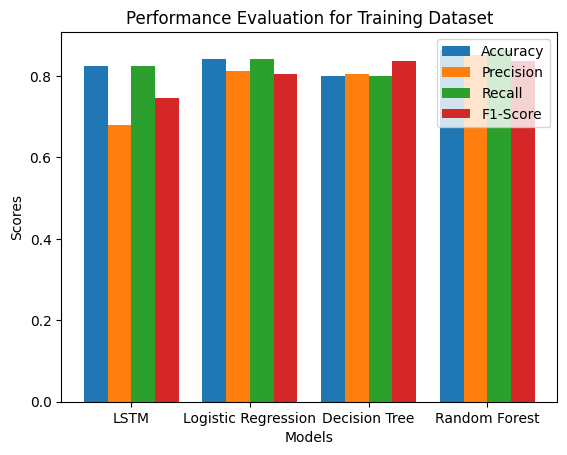

In [ ]:
from sklearn.metrics import roc_curve, auc

# Data
models = ['LSTM', 'Logistic Regression','Decision Tree', 'Random Forest']
accuracy = [ 0.8245046502224019,0.841083704003235,0.7994338859684593,0.8645369995956328]
precision = [0.6798079182383654,0.811742778359159,  0.8052562858184514, 0.8524802346822575]
recall = [0.8245046502224019, 0.841083704003235, 0.7994338859684593, 0.8645369995956328]
f1_score = [0.7451972437072153, 0.8042744980702115,0.8372125258523581,  0.8372125258523581]

# Example training and validation loss over epochs

# Metrics bar plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1_score]

fig, ax = plt.subplots()
bar_width = 0.2
index = np.arange(len(models))

for i, metric in enumerate(metrics):
    ax.bar(index + i * bar_width, values[i], bar_width, label=metric)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Evaluation for Training Dataset')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(models)
ax.legend()

plt.show()

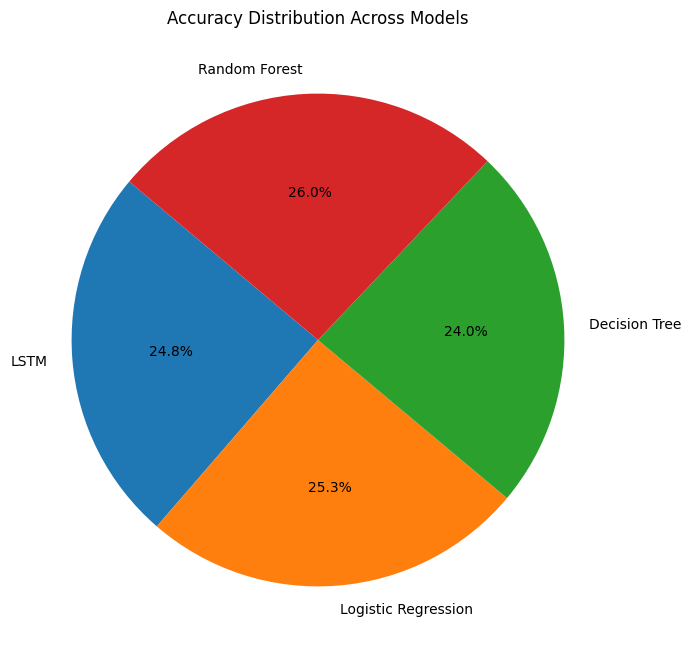

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['LSTM', 'Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy = [ 0.8245046502224019,0.841083704003235,0.7994338859684593,0.8645369995956328]

# Plotting the pie chart for accuracy
plt.figure(figsize=(8, 8))
plt.pie(
    accuracy,
    labels=models,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Accuracy Distribution Across Models')
plt.show()


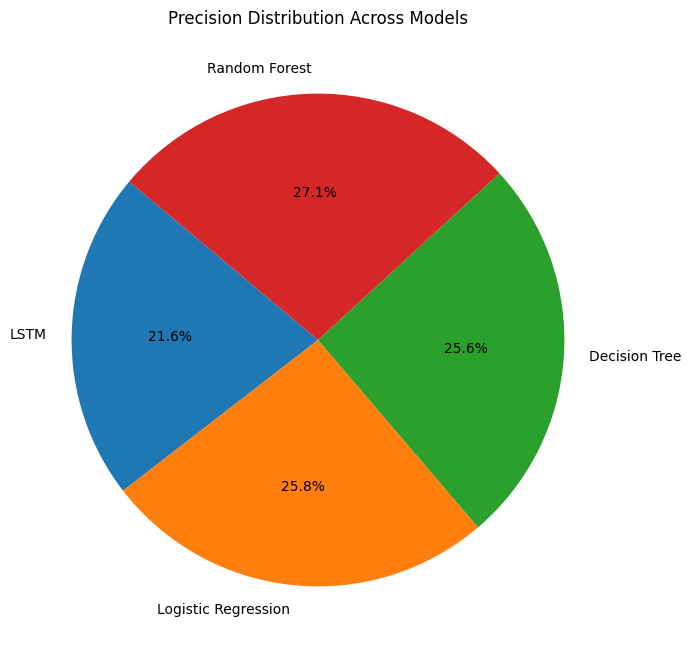

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['LSTM', 'Logistic Regression', 'Decision Tree', 'Random Forest']
precision = [0.6798079182383654,0.811742778359159,  0.8052562858184514, 0.8524802346822575]

# Plotting the pie chart for accuracy
plt.figure(figsize=(8, 8))
plt.pie(
    precision,
    labels=models,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Precision Distribution Across Models')
plt.show()


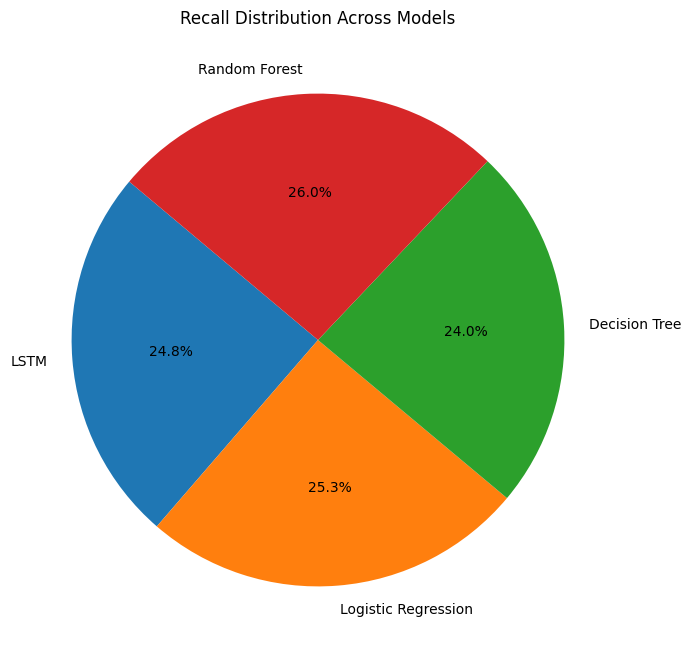

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['LSTM', 'Logistic Regression', 'Decision Tree', 'Random Forest']
recall = [0.8245046502224019, 0.841083704003235, 0.7994338859684593, 0.8645369995956328]

# Plotting the pie chart for accuracy
plt.figure(figsize=(8, 8))
plt.pie(
    recall,
    labels=models,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Recall Distribution Across Models')
plt.show()


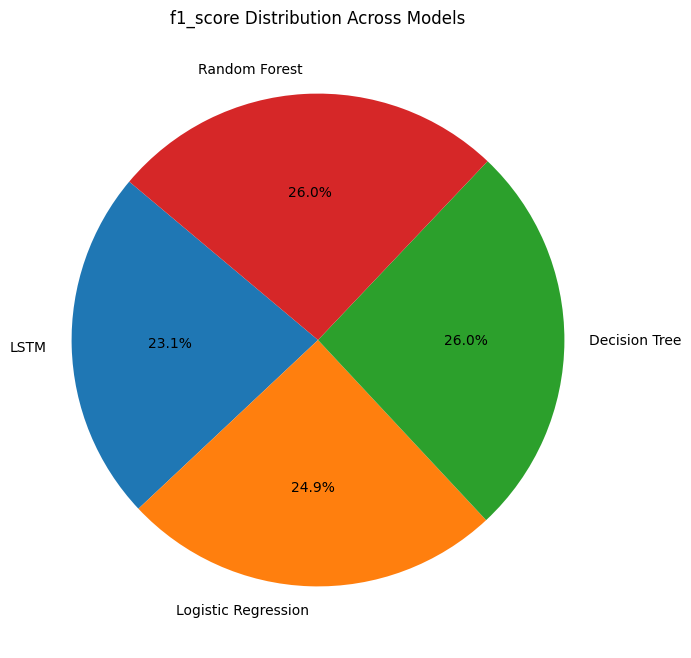

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['LSTM', 'Logistic Regression', 'Decision Tree', 'Random Forest']
f1_score = [0.7451972437072153, 0.8042744980702115,0.8372125258523581,  0.8372125258523581]

# Plotting the pie chart for accuracy
plt.figure(figsize=(8, 8))
plt.pie(
    f1_score,
    labels=models,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('f1_score Distribution Across Models')
plt.show()


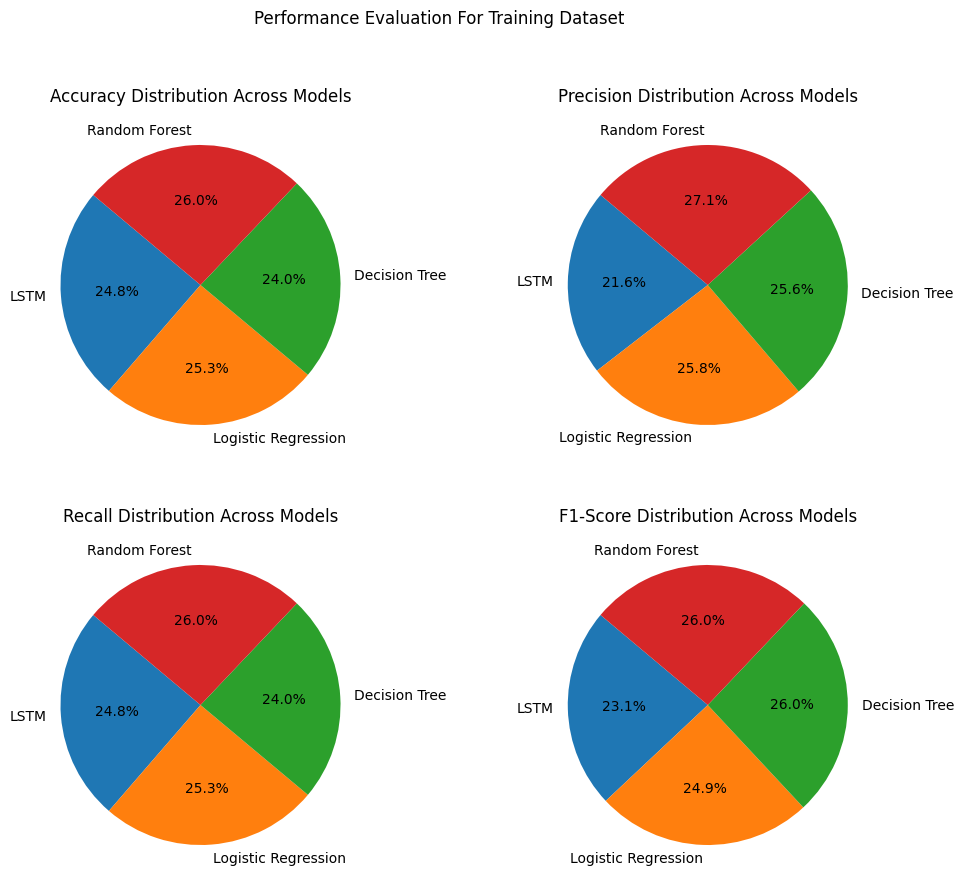

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['LSTM', 'Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy = [ 0.8245046502224019,0.841083704003235,0.7994338859684593,0.8645369995956328]
precision = [0.6798079182383654,0.811742778359159,  0.8052562858184514, 0.8524802346822575]
recall = [0.8245046502224019, 0.841083704003235, 0.7994338859684593, 0.8645369995956328]
f1_score = [0.7451972437072153, 0.8042744980702115,0.8372125258523581,  0.8372125258523581]

# Metrics and values for the pie charts
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1_score]

# Create individual pie charts for each metric
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Arrange subplots in a 2x2 grid

for i, (ax, metric, metric_values) in enumerate(zip(axes.flatten(), metrics, values)):
    ax.pie(metric_values, labels=models, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'{metric} Distribution Across Models')

plt.suptitle('Performance Evaluation For Training Dataset')
plt.show()


In [ ]:
!pip install joblib
import joblib

In [ ]:
joblib.dump(model,'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [ ]:
joblib.dump(dc_model, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

In [ ]:
joblib.dump(rf_model,'random_forest_model.pkl')

['random_forest_model.pkl']

In [ ]:
from google.colab import files

# For Keras models:
files.download('lstm.h5')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('logistic_regression_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('decision_tree_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('random_forest_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib
joblib.dump(rf_model, 'random_forest_model.joblib')


['random_forest_model.joblib']

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')



In [ ]:
# joblib.dump(rf_model, '/content/drive/MyDrive/random_forest_model.joblib')


TESTING OF THE MODELS BEGIN :


In [ ]:
df=pd.read_csv("Dataset-SA-test.csv")

In [ ]:
df.head(10)

,product_name,product_price,Rate,Review,Summary,Sentiment
0,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,ifb machine works well with fortune detergent +&-,product works very well and does the job perfe...,positive
1,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,best in the market!,product arrived on friday 23th mar and install...,positive
2,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,must buy!,absolute value for moneywell i bought this pro...,positive
3,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,mind-blowing purchase,writing this after about six weeks of continuo...,positive
4,IFB Neptune VX Free Standing 12 Place Settings...,38490,4,delightful,purchased in april 2021 before that visited ne...,positive
5,IFB Neptune VX Free Standing 12 Place Settings...,38490,4,express delivery in 1 day,booked on 31st dec and delivered on 1st jan su...,positive
6,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,super!,mind blowing deal thank you flipkart and ifb f...,positive
7,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,ifb dishwasher,i have been using ifb neptune vx dishwasher si...,positive
8,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,ifb sx1 nice product,just bought the product 7days washing quality ...,positive
9,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,simply awesome,excellent product easy to use with the 8 stand...,positive


In [ ]:
df.tail(10)

,product_name,product_price,Rate,Review,Summary,Sentiment
192673,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,nice product,positive
192674,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,wonderful,material good backing super,positive
192675,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,wonderful,superb,positive
192676,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,terrific,good quality products,positive
192677,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,classy product,beautiful set very nice,positive
192678,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive
192679,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive
192680,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive
192681,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive
192682,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,4,value-for-money,very good but mixing bowl not included is one ...,neutral


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192683 entries, 0 to 192682
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   192683 non-null  object
 1   product_price  192683 non-null  object
 2   Rate           192683 non-null  object
 3   Review         168019 non-null  object
 4   Summary        192673 non-null  object
 5   Sentiment      192683 non-null  object
dtypes: object(6)
memory usage: 8.8+ MB


In [ ]:
df.isnull().sum()

,0
product_name,0
product_price,0
Rate,0
Review,24664
Summary,10
Sentiment,0


In [ ]:
df=df.dropna(subset=['Summary'])

In [ ]:
df.isnull().sum()

,0
product_name,0
product_price,0
Rate,0
Review,24662
Summary,0
Sentiment,0


In [ ]:
import nltk
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

# Clear NLTK cache in case of corrupted downloads
nltk.data.clear_cache()

# Download the correct 'punkt' tokenizer model
nltk.download('punkt')

# Apply preprocessing to strip extra whitespaces
df['Summary'] = df['Summary'].apply(lambda x: x.strip())

# Test tokenization on a sample sentence (debugging step)
try:
    test_sentence = "This is a test sentence."
    print(word_tokenize(test_sentence))  # Should print a list of words

    # Apply word_tokenize to the DataFrame
    df['words'] = df['Summary'].apply(word_tokenize)
except LookupError:
    # If word_tokenize throws an error, use TreebankWordTokenizer
    tokenizer = TreebankWordTokenizer()
    df['words'] = df['Summary'].apply(lambda x: tokenizer.tokenize(x.strip()))

# Check the first few rows of the resulting 'words' column
print(df['words'].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-196-76a9ea6dbbf8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Summary'] = df['Summary'].apply(lambda x: x.strip())


0    [product, works, very, well, and, does, the, j...
1    [product, arrived, on, friday, 23th, mar, and,...
2    [absolute, value, for, moneywell, i, bought, t...
3    [writing, this, after, about, six, weeks, of, ...
4    [purchased, in, april, 2021, before, that, vis...
Name: words, dtype: object


In [ ]:
df

,product_name,product_price,Rate,Review,Summary,Sentiment,words
0,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,ifb machine works well with fortune detergent +&-,product works very well and does the job perfe...,positive,"[product, works, very, well, and, does, the, j..."
1,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,best in the market!,product arrived on friday 23th mar and install...,positive,"[product, arrived, on, friday, 23th, mar, and,..."
2,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,must buy!,absolute value for moneywell i bought this pro...,positive,"[absolute, value, for, moneywell, i, bought, t..."
3,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,mind-blowing purchase,writing this after about six weeks of continuo...,positive,"[writing, this, after, about, six, weeks, of, ..."
4,IFB Neptune VX Free Standing 12 Place Settings...,38490,4,delightful,purchased in april 2021 before that visited ne...,positive,"[purchased, in, april, 2021, before, that, vis..."
...,...,...,...,...,...,...,...
192678,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive,"[good, product]"
192679,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive,[nice]
192680,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive,"[very, nice, and, fast, delivery]"
192681,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive,"[awesome, product]"


In [ ]:
df['words']=[[word.lower() for word in sentence]for sentence in df['words']]

In [ ]:
df.head(10)

,product_name,product_price,Rate,Review,Summary,Sentiment,words
0,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,ifb machine works well with fortune detergent +&-,product works very well and does the job perfe...,positive,"[product, works, very, well, and, does, the, j..."
1,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,best in the market!,product arrived on friday 23th mar and install...,positive,"[product, arrived, on, friday, 23th, mar, and,..."
2,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,must buy!,absolute value for moneywell i bought this pro...,positive,"[absolute, value, for, moneywell, i, bought, t..."
3,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,mind-blowing purchase,writing this after about six weeks of continuo...,positive,"[writing, this, after, about, six, weeks, of, ..."
4,IFB Neptune VX Free Standing 12 Place Settings...,38490,4,delightful,purchased in april 2021 before that visited ne...,positive,"[purchased, in, april, 2021, before, that, vis..."
5,IFB Neptune VX Free Standing 12 Place Settings...,38490,4,express delivery in 1 day,booked on 31st dec and delivered on 1st jan su...,positive,"[booked, on, 31st, dec, and, delivered, on, 1s..."
6,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,super!,mind blowing deal thank you flipkart and ifb f...,positive,"[mind, blowing, deal, thank, you, flipkart, an..."
7,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,ifb dishwasher,i have been using ifb neptune vx dishwasher si...,positive,"[i, have, been, using, ifb, neptune, vx, dishw..."
8,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,ifb sx1 nice product,just bought the product 7days washing quality ...,positive,"[just, bought, the, product, 7days, washing, q..."
9,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,simply awesome,excellent product easy to use with the 8 stand...,positive,"[excellent, product, easy, to, use, with, the,..."


In [ ]:
from nltk.corpus import stopwords #to remove stop words like is ,of ,and etc...
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words=set(stopwords.words('english'))
def stopword(sentence):
    return [word for word in sentence if word not in stop_words]

df['words']=df['words'].apply(stopword)

In [ ]:
df.head(10)

,product_name,product_price,Rate,Review,Summary,Sentiment,words
0,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,ifb machine works well with fortune detergent +&-,product works very well and does the job perfe...,positive,"[product, works, well, job, perfectly, fortune..."
1,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,best in the market!,product arrived on friday 23th mar and install...,positive,"[product, arrived, friday, 23th, mar, installa..."
2,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,must buy!,absolute value for moneywell i bought this pro...,positive,"[absolute, value, moneywell, bought, product, ..."
3,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,mind-blowing purchase,writing this after about six weeks of continuo...,positive,"[writing, six, weeks, continuous, use, minimum..."
4,IFB Neptune VX Free Standing 12 Place Settings...,38490,4,delightful,purchased in april 2021 before that visited ne...,positive,"[purchased, april, 2021, visited, nearby, ifb,..."
5,IFB Neptune VX Free Standing 12 Place Settings...,38490,4,express delivery in 1 day,booked on 31st dec and delivered on 1st jan su...,positive,"[booked, 31st, dec, delivered, 1st, jan, super..."
6,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,super!,mind blowing deal thank you flipkart and ifb f...,positive,"[mind, blowing, deal, thank, flipkart, ifb, pr..."
7,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,ifb dishwasher,i have been using ifb neptune vx dishwasher si...,positive,"[using, ifb, neptune, vx, dishwasher, since, 1..."
8,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,ifb sx1 nice product,just bought the product 7days washing quality ...,positive,"[bought, product, 7days, washing, quality, goo..."
9,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,simply awesome,excellent product easy to use with the 8 stand...,positive,"[excellent, product, easy, use, 8, standard, p..."


In [ ]:
from nltk.stem import PorterStemmer  # to change the word into it's base word.Example eating = eat,formality=formalti
stemmer=PorterStemmer()

def stemming_word(row):
    return [stemmer.stem(word) for word in row]

df['words']=df['words'].apply(stemming_word)


In [ ]:
df.head(10)

,product_name,product_price,Rate,Review,Summary,Sentiment,words
0,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,ifb machine works well with fortune detergent +&-,product works very well and does the job perfe...,positive,"[product, work, well, job, perfectli, fortun, ..."
1,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,best in the market!,product arrived on friday 23th mar and install...,positive,"[product, arriv, friday, 23th, mar, instal, do..."
2,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,must buy!,absolute value for moneywell i bought this pro...,positive,"[absolut, valu, moneywel, bought, product, go,..."
3,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,mind-blowing purchase,writing this after about six weeks of continuo...,positive,"[write, six, week, continu, use, minimum, 2, l..."
4,IFB Neptune VX Free Standing 12 Place Settings...,38490,4,delightful,purchased in april 2021 before that visited ne...,positive,"[purchas, april, 2021, visit, nearbi, ifb, poi..."
5,IFB Neptune VX Free Standing 12 Place Settings...,38490,4,express delivery in 1 day,booked on 31st dec and delivered on 1st jan su...,positive,"[book, 31st, dec, deliv, 1st, jan, super, spee..."
6,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,super!,mind blowing deal thank you flipkart and ifb f...,positive,"[mind, blow, deal, thank, flipkart, ifb, produ..."
7,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,ifb dishwasher,i have been using ifb neptune vx dishwasher si...,positive,"[use, ifb, neptun, vx, dishwash, sinc, 1, half..."
8,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,ifb sx1 nice product,just bought the product 7days washing quality ...,positive,"[bought, product, 7day, wash, qualiti, good, p..."
9,IFB Neptune VX Free Standing 12 Place Settings...,38490,5,simply awesome,excellent product easy to use with the 8 stand...,positive,"[excel, product, easi, use, 8, standard, progr..."


In [ ]:
dict={'positive':1,'neutral':0,'negative':-1} # convert sentiment column into numeric column
df['Sentiment']=df['Sentiment'].map(dict)

In [ ]:
df['Sentiment'].value_counts()

,count
Sentiment,
1,156332
-1,26647
0,9694


In [ ]:
data=df[['words','Sentiment']]

In [ ]:
data

,words,Sentiment
0,"[product, work, well, job, perfectli, fortun, ...",1
1,"[product, arriv, friday, 23th, mar, instal, do...",1
2,"[absolut, valu, moneywel, bought, product, go,...",1
3,"[write, six, week, continu, use, minimum, 2, l...",1
4,"[purchas, april, 2021, visit, nearbi, ifb, poi...",1
...,...,...
192678,"[good, product]",1
192679,[nice],1
192680,"[nice, fast, deliveri]",1
192681,"[awesom, product]",1


FEATURE EXTRACTION

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

def word_vecs(data):
    # Convert entries to strings if they are not already
    cleaned_data = [" ".join(map(str, words)) if isinstance(words, list) else str(words) for words in data['words']]
    docs = nlp.pipe(cleaned_data, batch_size=50)
    return [doc.vector for doc in docs]

data['words'] = word_vecs(data)


<ipython-input-209-6da374da28c0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['words'] = word_vecs(data)


In [ ]:
data

,words,Sentiment
0,"[-0.049764674, -0.6561606, 0.13983089, 0.25258...",1
1,"[-0.0070706, -0.53970665, 0.12796201, 0.159996...",1
2,"[0.10601485, -0.820484, 0.15020841, 0.21650988...",1
3,"[0.010718128, -0.6904637, 0.052123234, 0.05963...",1
4,"[0.017903153, -0.744379, -0.00084202905, -0.08...",1
...,...,...
192678,"[-0.39959332, -0.7848977, -0.42706123, 0.49756...",1
192679,"[-1.0640047, -1.4607354, -0.37849164, -0.23538...",1
192680,"[-0.49610415, -1.4048434, 0.13907956, 0.555913...",1
192681,"[-0.71825904, -0.959419, -0.46459317, 0.669171...",1


In [ ]:
data.to_json('output.json', orient='records', lines=True)

In [ ]:
data_2=pd.read_json('output.json',lines=True)

In [ ]:
data_2

,words,Sentiment
0,"[-0.049764674200000004, -0.6561605930000001, 0...",1
1,"[-0.0070706001, -0.5397066474000001, 0.1279620...",1
2,"[0.1060148478, -0.8204839826, 0.1502084136, 0....",1
3,"[0.0107181277, -0.6904637218, 0.0521232337, 0....",1
4,"[0.0179031529, -0.744378984, -0.0008420291, -0...",1
...,...,...
192668,"[-0.39959332350000004, -0.7848976851, -0.42706...",1
192669,"[-1.0640046597, -1.4607354403000001, -0.378491...",1
192670,"[-0.49610415100000005, -1.4048434496, 0.139079...",1
192671,"[-0.7182590365, -0.9594190121, -0.4645931721, ...",1


Round the values

In [ ]:
vectorized_data=data_2['words']

In [ ]:
vectorized_data=vectorized_data.apply(lambda x :[ round(value,3) for value in x])

In [ ]:
vectorized_data=vectorized_data.apply(lambda x: np.array(x))

In [ ]:
vectorized_data

,words
0,"[-0.05, -0.656, 0.14, 0.253, -0.092, -0.095, 0..."
1,"[-0.007, -0.54, 0.128, 0.16, 0.174, -0.248, 0...."
2,"[0.106, -0.82, 0.15, 0.217, -0.116, -0.277, 0...."
3,"[0.011, -0.69, 0.052, 0.06, -0.016, -0.215, 0...."
4,"[0.018, -0.744, -0.001, -0.086, -0.02, -0.232,..."
...,...
192668,"[-0.4, -0.785, -0.427, 0.498, -0.324, -0.056, ..."
192669,"[-1.064, -1.461, -0.378, -0.235, -0.811, 0.054..."
192670,"[-0.496, -1.405, 0.139, 0.556, -0.548, 0.073, ..."
192671,"[-0.718, -0.959, -0.465, 0.669, -0.652, -0.024..."


In [ ]:
X_data=pd.DataFrame(vectorized_data.tolist())

In [ ]:
data_3=pd.concat([data_2,X_data],axis=1)

In [ ]:
data_3.isnull().sum()

,0
words,0
Sentiment,0
0,48
1,48
2,48
...,...
91,48
92,48
93,48
94,48


In [ ]:
data_3=data_3.dropna()

In [ ]:
data_3.to_json('data_4.json',orient='records',lines=True)

Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split

X=data_3.drop(['words','Sentiment'],axis=1)
y=data_3['Sentiment']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

k_best=SelectKBest(score_func=mutual_info_classif,k=60)
X_train_selected=k_best.fit_transform(X_train,y_train)
X_test_selected=k_best.fit(X_test,y_test)

selected_features_indices=k_best.get_support(indices=True)
print(f'Selected Features indices :{selected_features_indices}')

In [ ]:
selected_features=[0 , 2 , 9, 10, 13, 15, 17, 18, 19, 20, 22, 25, 27, 28, 29, 30, 31, 32, 35, 36, 37, 41, 42, 45,
 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64 ,65, 69, 72, 73, 75, 76,
 79, 81, 82, 84, 85, 87, 88, 89, 92, 93, 94, 95]

In [ ]:
X_train_selected=X_train.iloc[:,selected_features]
X_test_selected=X_test.iloc[:,selected_features]

Model Loading :

In [ ]:
import joblib
random_forest_model = joblib.load('random_forest_model.pkl')


In [ ]:

decision_tree_model = joblib.load('decision_tree_model.pkl')

In [ ]:
from tensorflow.keras.models import load_model

# Load the LSTM model
lstm_model = load_model('lstm.h5')

In [ ]:
logistic_regression_model = joblib.load('logistic_regression_model.pkl')

In [ ]:
rf_predictions = random_forest_model.predict(X_test_selected)


In [ ]:
dt_predictions = decision_tree_model.predict(X_test_selected)

In [ ]:
lr_predictions = logistic_regression_model.predict(X_test_selected)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train Random Forest model (assuming you have X_train_selected and y_train)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_selected, y_train)

# Predicting on the test set
rf_predictions = rf_model.predict(X_test_selected)

# Evaluation metrics for Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)

# Print Results
print(f"Random Forest - Accuracy: {rf_accuracy}")
print(f"Random Forest - Precision: {rf_precision}")
print(f"Random Forest - Recall: {rf_recall}")
print(f"Random Forest - F1 Score: {rf_f1}")
print(f"Random Forest - Confusion Matrix:\n{rf_conf_matrix}")


Random Forest - Accuracy: 0.8839195327709279
Random Forest - Precision: 0.8773869999766065
Random Forest - Recall: 0.8839195327709279
Random Forest - F1 Score: 0.868495400716541
Random Forest - Confusion Matrix:
[[ 2394    83  2765]
 [  195   833   977]
 [  340   112 30826]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_selected, y_train)

# Predicting on the test set
dt_predictions = dt_model.predict(X_test_selected)

# Evaluation metrics for Decision Tree
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions, average='weighted')
dt_recall = recall_score(y_test, dt_predictions, average='weighted')
dt_f1 = f1_score(y_test, dt_predictions, average='weighted')
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)

# Print Results
print(f"Decision Tree - Accuracy: {dt_accuracy}")
print(f"Decision Tree - Precision: {dt_precision}")
print(f"Decision Tree - Recall: {dt_recall}")
print(f"Decision Tree - F1 Score: {dt_f1}")
print(f"Decision Tree - Confusion Matrix:\n{dt_conf_matrix}")


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_selected, y_train)

# Predicting on the test set
lr_predictions = lr_model.predict(X_test_selected)

# Evaluation metrics for Logistic Regression
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions, average='weighted')
lr_recall = recall_score(y_test, lr_predictions, average='weighted')
lr_f1 = f1_score(y_test, lr_predictions, average='weighted')
lr_conf_matrix = confusion_matrix(y_test, lr_predictions)

# Print Results
print(f"Logistic Regression - Accuracy: {lr_accuracy}")
print(f"Logistic Regression - Precision: {lr_precision}")
print(f"Logistic Regression - Recall: {lr_recall}")
print(f"Logistic Regression - F1 Score: {lr_f1}")
print(f"Logistic Regression - Confusion Matrix:\n{lr_conf_matrix}")


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import load_model

# Load the trained LSTM model
lstm_model = load_model('lstm.h5')

# Ensure X_test_selected is an array with shape (num_samples, 60)
X_test_selected = np.array(X_test_selected)  # Convert to numpy array if not already

# Predict using the loaded LSTM model
lstm_predictions = lstm_model.predict(X_test_selected)

# Convert probabilities to binary class labels (threshold at 0.5)
lstm_predictions = (lstm_predictions > 0.5).astype("int32")

# Evaluation metrics for LSTM
lstm_accuracy = accuracy_score(y_test, lstm_predictions)
lstm_precision = precision_score(y_test, lstm_predictions, average='weighted')
lstm_recall = recall_score(y_test, lstm_predictions, average='weighted')
lstm_f1 = f1_score(y_test, lstm_predictions, average='weighted')
lstm_conf_matrix = confusion_matrix(y_test, lstm_predictions)

# Print Results
print(f"LSTM - Accuracy: {lstm_accuracy}")
print(f"LSTM - Precision: {lstm_precision}")
print(f"LSTM - Recall: {lstm_recall}")
print(f"LSTM - F1 Score: {lstm_f1}")
print(f"LSTM - Confusion Matrix:\n{lstm_conf_matrix}")


In [ ]:
from sklearn.metrics import roc_curve, auc

# Data
models = ['LSTM', 'Logistic Regression','Decision Tree', 'Random Forest']
accuracy = [0.8118883841661259, 0.8465931213497728,0.8391693705386113,0.8840752757949384]
precision = [0.6591627483438828,0.8284275278259496 , 0.8387360549617279, 0.8774992109412763]
recall = [0.8118883841661259, 0.8465931213497728, 0.8391693705386113, 0.8840752757949384]
f1_score = [0.7275975210219643,0.8183609094840777, 0.8389030813285607, 0.8685673935257524]

# Metrics bar plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1_score]

fig, ax = plt.subplots()
bar_width = 0.2
index = np.arange(len(models))

for i, metric in enumerate(metrics):
    ax.bar(index + i * bar_width, values[i], bar_width, label=metric)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Evaluation For Testing Dataset')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(models)
ax.legend()

plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['LSTM', 'Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy = [0.8118883841661259, 0.8465931213497728,0.8391693705386113,0.8840752757949384]

# Plotting the pie chart for accuracy
plt.figure(figsize=(8, 8))
plt.pie(
    accuracy,
    labels=models,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Accuracy Distribution Across Models  of Testing Dataset')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['LSTM', 'Logistic Regression', 'Decision Tree', 'Random Forest']
precision = [0.6591627483438828,0.8284275278259496 , 0.8387360549617279, 0.8774992109412763]

# Plotting the pie chart for accuracy
plt.figure(figsize=(8, 8))
plt.pie(
    precision,
    labels=models,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Precision Distribution Across Models  of Testing Dataset')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['LSTM', 'Logistic Regression', 'Decision Tree', 'Random Forest']
recall = [0.8118883841661259, 0.8465931213497728, 0.8391693705386113, 0.8840752757949384]

# Plotting the pie chart for accuracy
plt.figure(figsize=(8, 8))
plt.pie(
    recall,
    labels=models,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Recall Distribution Across Models  of Testing Dataset')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['LSTM', 'Logistic Regression', 'Decision Tree', 'Random Forest']
f1_score = [0.7275975210219643,0.8183609094840777, 0.8389030813285607, 0.8685673935257524]

# Plotting the pie chart for accuracy
plt.figure(figsize=(8, 8))
plt.pie(
    f1_score,
    labels=models,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('f1_score Distribution Across Mod els  of Testing Dataset')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['LSTM', 'Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy = [0.8118883841661259, 0.8465931213497728, 0.8391693705386113, 0.8840752757949384]
precision = [0.6591627483438828, 0.8284275278259496, 0.8387360549617279, 0.8774992109412763]
recall = [0.8118883841661259, 0.8465931213497728, 0.8391693705386113, 0.8840752757949384]
f1_score = [0.7275975210219643, 0.8183609094840777, 0.8389030813285607, 0.8685673935257524]

# Metrics and values for the pie charts
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1_score]

# Create individual pie charts for each metric
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Arrange subplots in a 2x2 grid

for i, (ax, metric, metric_values) in enumerate(zip(axes.flatten(), metrics, values)):
    ax.pie(metric_values, labels=models, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'{metric} Distribution Across Models')

plt.suptitle('Performance Evaluation For Testing Dataset')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Data for Random Forest model
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
random_forest_values = [0.8840752757949384, 0.8774992109412763, 0.8840752757949384, 0.8685673935257524]

# Set explode to slightly separate each slice
explode = [0.05, 0.05, 0.05, 0.05]  # Adjust this as needed

# Create a donut chart by setting wedgeprops with a smaller width
plt.figure(figsize=(8, 8))
plt.pie(random_forest_values, labels=metrics, autopct='%1.2f', explode=explode, startangle=140,
        wedgeprops={'width': 0.3})  # Adjust width for a donut effect
plt.title('Performance Metrics for Random Forest Model for the Testing Dataset')
plt.show()


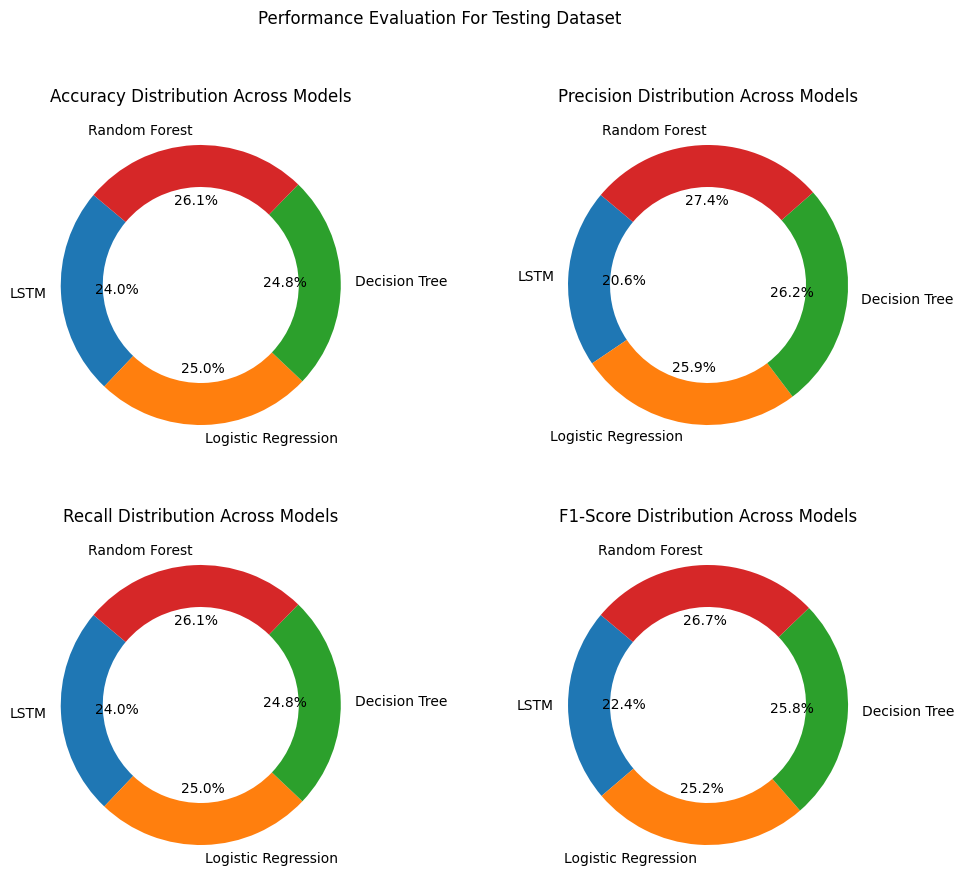

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['LSTM', 'Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy = [0.8118883841661259, 0.8465931213497728, 0.8391693705386113, 0.8840752757949384]
precision = [0.6591627483438828, 0.8284275278259496, 0.8387360549617279, 0.8774992109412763]
recall = [0.8118883841661259, 0.8465931213497728, 0.8391693705386113, 0.8840752757949384]
f1_score = [0.7275975210219643, 0.8183609094840777, 0.8389030813285607, 0.8685673935257524]

# Metrics and values for the donut charts
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1_score]

# Create individual donut charts for each metric
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Arrange subplots in a 2x2 grid

for i, (ax, metric, metric_values) in enumerate(zip(axes.flatten(), metrics, values)):
    ax.pie(metric_values, labels=models, autopct='%1.1f%%', startangle=140,
           wedgeprops={'width': 0.3})  # Width < 1 for a donut effect
    ax.set_title(f'{metric} Distribution Across Models')

plt.suptitle('Performance Evaluation For Testing Dataset')
plt.show()


Comparison Chart of Training and Testing Data

In [ ]:
models1 = ['LSTM', 'Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy1 = [ 0.8245046502224019,0.841083704003235,0.7994338859684593,0.8645369995956328]

models2 = ['LSTM', 'Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy2 = [0.8118883841661259, 0.8465931213497728,0.8391693705386113,0.8840752757949384]

# Combining data
models = models1 + models2
accuracy = accuracy1 + accuracy2

# Assigning colors to each model split
colors1 = ['blue', 'green', 'red', 'purple']
colors2 = ['blue', 'green', 'red', 'purple']
colors = colors1 + colors2

# Define bar width and positions
bar_width = 0.80
index1 = np.arange(len(models1))
index2 = np.arange(len(models2)) + len(models1) + 1  # Adding a gap between the two groups

# Creating the bar plot
plt.figure(figsize=(10,6))

# Plotting the bars with labels for legend
bars1 = plt.bar(index1, accuracy1, bar_width, color=colors1)
bars2 = plt.bar(index2, accuracy2, bar_width, color=colors2)

# Adding title and labels
plt.title('Training  vs Testing')
plt.xlabel('Models and Train-Test Splits')
plt.ylabel('Accuracy')

# Adjusting x-axis labels
plt.xticks(np.concatenate([index1, index2]),
           models1 + models2, rotation=45, ha='right')

# Creating custom legends
legend_labels = ['LSTM', 'Logistic Regression', 'Decision Tree', 'Random Forest']
legend_colors = ['blue', 'green', 'red', 'purple']
legend_handles = [plt.Line2D([0], [0], color=color, lw=4) for color in legend_colors]
plt.legend(legend_handles, legend_labels, title='Models')

# Showing the plot
plt.show()

